In [58]:
import numpy as np
import pandas as pd

In [59]:
# y = mx + c

# dates = pd
x = np.arange(1096)

c = np.random.randint(20000,100000,1096)
m = 0.754 * x * 1000

y = m*x + c



In [60]:
ds = pd.date_range('2016-01-01','2018-12-31')

ds



DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=1096, freq='D')

In [61]:

df = pd.DataFrame(data=y, index=ds)




In [62]:
df.head()
df.columns=['pop']

df.head()

df.index.name = 'day'
df.head()

,pop
day,
2016-01-01,32285.0
2016-01-02,30218.0
2016-01-03,83862.0
2016-01-04,38000.0
2016-01-05,43884.0


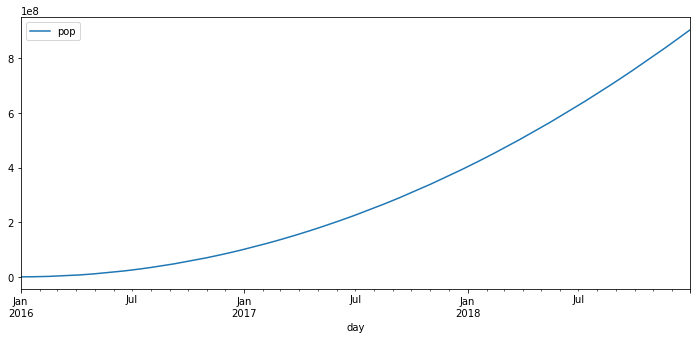

In [63]:
import matplotlib
%matplotlib inline
df.plot(figsize=(12,5))




In [64]:
train = df.iloc[:1067]
test = df.iloc[1067:]

In [65]:
from statsmodels.tsa.ar_model import AR,ARResults




In [67]:
model = AR(df['pop'])

In [69]:
AR1Fit = model.fit(maxlag=1)
AR1Fit.params

const     309904.840072
L1.pop         1.001713
dtype: float64

In [71]:
start = len(train)
end = len(train) + len (test) -1
print(start)
print(end)

1067
1095


In [74]:
pred1 = AR1Fit.predict(start=start, end=end)

pred1 = pred1.rename('AR1P')


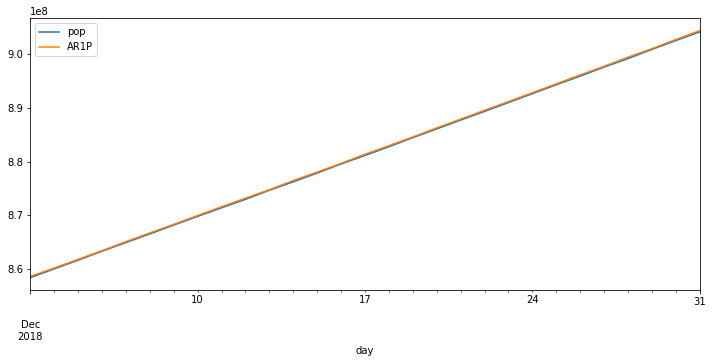

In [75]:
test.plot(figsize=(12,5), legend=True)
pred1.plot(legend=True)


In [77]:
ARFit = model.fit(ic='t-stat')

ARFit.params



const      77442.891173
L1.pop         0.165276
L2.pop         0.121061
L3.pop         0.158504
L4.pop         0.134819
L5.pop         0.061489
L6.pop         0.144607
L7.pop         0.124198
L8.pop         0.164964
L9.pop         0.149476
L10.pop        0.057256
L11.pop        0.072021
L12.pop       -0.029682
L13.pop        0.066643
L14.pop        0.036391
L15.pop       -0.009564
L16.pop       -0.029100
L17.pop       -0.051935
L18.pop       -0.001509
L19.pop       -0.071042
L20.pop       -0.051363
L21.pop       -0.053799
L22.pop       -0.158714
dtype: float64

In [79]:
pred22 = ARFit.predict(start,end)

pred22 = pred22.rename('AR22P')
